<a href="https://colab.research.google.com/github/Khushangz/Satelite_Image_Classification/blob/main/CCN_image_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision


import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
import pandas as pd


In [ ]:
torch.cuda.is_available()

False

In [ ]:
device=torch.device('cuda:0')


In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)

In [ ]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [ ]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()
    self.cnn1=nn.Conv2D(in_channels=1, out_channels=16, kernel_size=5, padding=2)
    self.maxpool1=nn.MaxPool2d(kernel_size=2)
    self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
    self.maxpool2=nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(1875, 2)
  def forward(self, x):
    x = self.cnn1(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.cnn2(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    return x




In [ ]:
model=net()
model.to

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


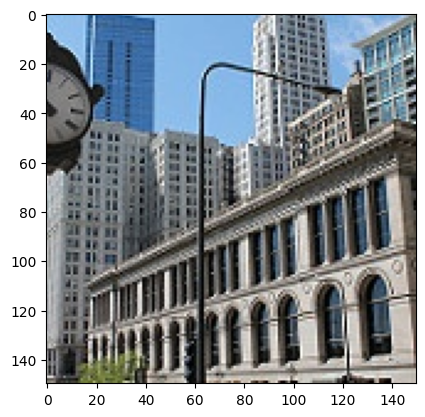

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        images.append(img)
    return images

# Specify your image directory here
folder_path = '/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/buildings'
building = load_images_from_folder(folder_path)
folder_path = '/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/forest'
forest = load_images_from_folder(folder_path)
folder_path = '/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/glacier'
glacier = load_images_from_folder(folder_path)
folder_path = '/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/mountain'
mountain = load_images_from_folder(folder_path)
folder_path = '/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/sea'
sea= load_images_from_folder(folder_path)
folder_path = '/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/street'
street = load_images_from_folder(folder_path)

# Display the first image
plt.imshow(building[0])
plt.show()





In [ ]:
for i in building[0:20]:
  plt.imshow(i)
  plt.show()

In [ ]:
for i in sea[0:20]:
  plt.imshow(i)
  plt.show()
  i.size


In [ ]:



composed = transforms.Compose([transforms.Resize((100,100)), transforms.ToTensor()])


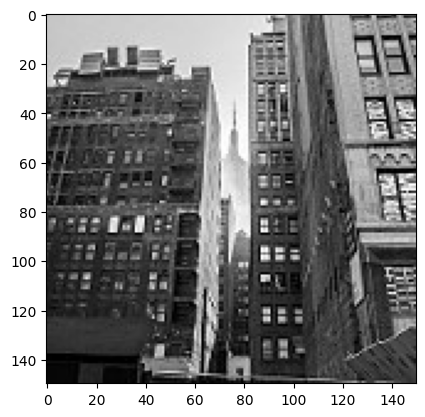

In [ ]:
plt.imshow(building[7])
plt.show()


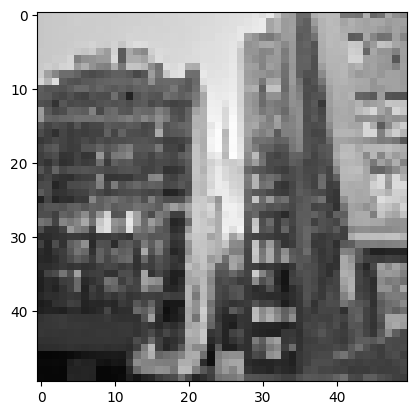

In [ ]:

i_tensor = composed(building[7])

# Define max pooling



conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=1, padding=0)
max1= nn.MaxPool2d(kernel_size=2)
# Apply convolution (assuming i_tensor is already in the shape [3, H, W])
i_conv = conv1(i_tensor.unsqueeze(0))  # Add batch dimension
i_conv=max1(i_tensor)
# Adjust the output for visualization
# Remove batch dimension and permute dimensions from [B, C, H, W] to [H, W, C] for matplotlib
i_conv_squeezed = i_conv.squeeze(0).permute(-2, 2, 0)

# Convert to numpy for plotting, ensuring to detach from gradients and bring to CPU if necessary
i_conv_np = i_conv_squeezed.detach().cpu().numpy()

# Since the convolutional output can have negative values or values > 1, normalize for visualization
#i_conv_np = (i_conv_np - i_conv_np.min()) / (i_conv_np.max() - i_conv_np.min())

# Plot the image
plt.imshow(i_conv_np)
plt.show()



In [ ]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()
    self.cnn1=nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5, padding=2)
    self.maxpool1=nn.MaxPool2d(kernel_size=2)
    self.cnn2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5, stride=1, padding=2)
    self.maxpool2=nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(1875, 2)
  def forward(self, x):
    x = self.cnn1(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.cnn2(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    return x




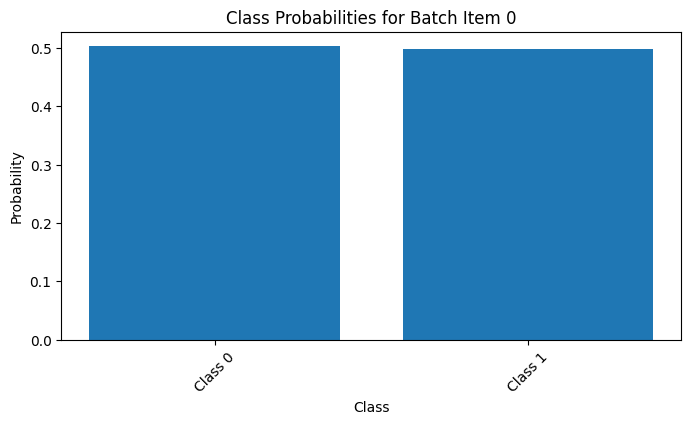

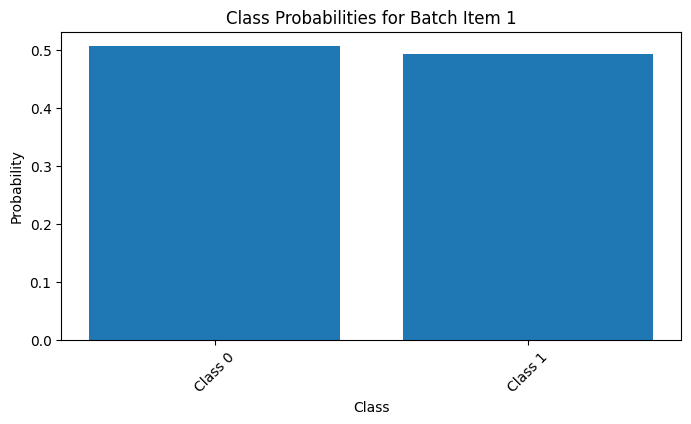

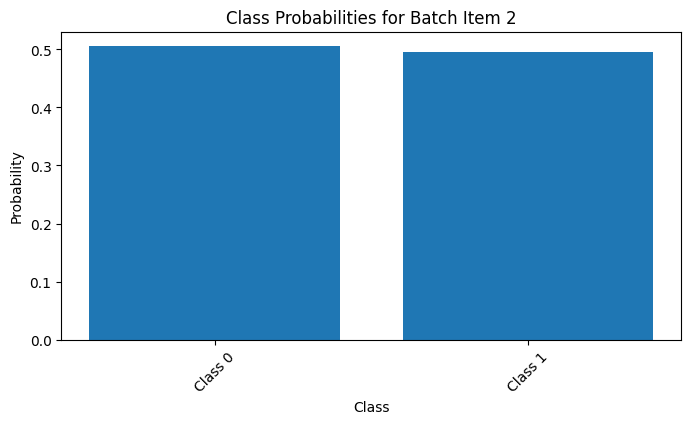

In [ ]:
probabilities = torch.softmax(y, dim=1)

# Visualization
num_classes = probabilities.size(1)
class_names = [f"Class {i}" for i in range(num_classes)]

# Plot for each item in the batch
for i, probs in enumerate(probabilities):
    plt.figure(figsize=(8, 4))
    plt.bar(class_names, probs.detach().numpy())
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title(f'Class Probabilities for Batch Item {i}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
len(sea+forest+glacier+mountain+street+ building)

14034

In [ ]:
y=[]
for i in range(14034):
  if i<2191:
    y.append(1)
  else:
    y.append(0)

In [ ]:
x=building+forest+glacier+mountain+sea +street

In [ ]:
len(x)

14034

In [ ]:

import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from numpy import mean
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [ ]:
import torch
from torch.utils.data import DataLoader

def train(model, train_dataset, optimizer, criterion):
    # Check if CUDA (GPU support) is available and set the device accordingly
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Training on {device}')

    # Move model to the chosen device
    model.to(device)

    trainloader_train = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    model.train()  # Set the model to training mode

    for epoch in range(10):
        for x, y in trainloader_train:
            # Move data to the chosen device
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()  # Zero the gradients
            yhat = model(x)  # Forward pass
            loss = criterion(yhat, y)  # Compute the loss
            loss.backward()  # Backpropagate the gradients
            optimizer.step()  # Update the parameters

    # Evaluation part
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in trainloader_train:  # Should ideally be a separate validation or test loader
            # Move data to the chosen device
            x, y = x.to(device), y.to(device)

            outputs = model(x)
            _, predicted = torch.max(outputs.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()

        accuracy = 100 * correct / total
        print(f'Accuracy of the model on the training dataset: {accuracy:.2f}%')



In [ ]:
criterion = nn.CrossEntropyLoss()
model=net()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for i in range(len(x)):
  x[i]=composed(x[i])

In [ ]:
# Assuming x is a list of tensor objects representing images, ensure it's correctly stacked
x_tensor = torch.stack(x) if isinstance(x[0], torch.Tensor) else torch.tensor(x, dtype=torch.float32)

# Ensure y is correctly converted to a tensor
# Make sure you're using the correct variable name as per your dataset
y_tensor = torch.tensor(y, dtype=torch.long)  # Adjust y to the correct variable name if needed

# Now, create the TensorDataset with these tensors
train_dataset = TensorDataset(x_tensor, y_tensor)

# Then, pass train_dataset to your train function





In [ ]:
train(model, train_dataset, optimizer, criterion)

Accuracy of the model on the test dataset: 89.04%


In [ ]:
folder_path = '/content/drive/MyDrive/Veltris/Untitled Folder/seg_test/seg_test/buildings'
building_test = load_images_from_folder(folder_path)

In [ ]:
x_test=[]
for i in range(len(building_test)):
  x_test.append(composed(building_test[i]))

In [ ]:
x_tensor = torch.stack(x) if isinstance(x_test[0], torch.Tensor) else torch.tensor(x_test, dtype=torch.float32)


In [ ]:
len(x)


14034

In [ ]:
import torch

# Assuming `model` is your trained model and `data` is your input data
model.eval()  # Set the model to evaluation mode


model.eval()  # Set the model to evaluation mode

# Ensure the tensor is on the same device as your model (e.g., CPU or CUDA/GPU)
images_tensor = x_tensor.to(next(model.parameters()).device)

# Predict
with torch.no_grad():  # No need to compute gradients
    outputs = model(images_tensor)

# If the model is for classification, you might want to convert the outputs to probabilities
probabilities = torch.softmax(outputs, dim=1)

# You can then get the predicted classes
predicted_classes = probabilities.argmax(dim=1)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


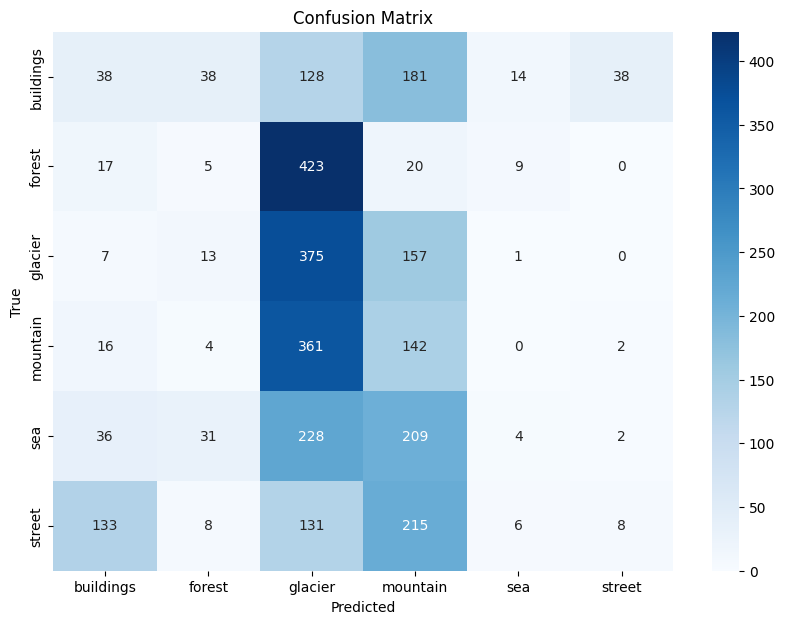

Precision: 0.1460
Recall: 0.1907
F1 Score: 0.1235
Accuracy: 0.1907


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `train_dataset` and `test_dataset` are already defined and loaded
# For example purposes, let's define transformations and load datasets (modify paths accordingly)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ImageFolder(root='/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/', transform=transform)
test_dataset = ImageFolder(root='/content/drive/MyDrive/Veltris/Untitled Folder/seg_test/seg_test', transform=transform)

# Load a pretrained model and modify it for your number of classes
num_classes = len(train_dataset.classes)
model = models.resnet18(pretrained=True)

model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 1024),
    nn.Linear(1024, 256),
    nn.Linear(256,6)  # Output layer with `num_classes` output units
)


# Define loss function, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model or directly use for evaluation if training is not required
# Skipping training loop for brevity, assuming the model is ready for evaluation

# Evaluate on test dataset
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

all_preds = []
all_targets = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, f1-score, and accuracy
precision = precision_score(all_targets, all_preds, average='weighted')
recall = recall_score(all_targets, all_preds, average='weighted')
f1 = f1_score(all_targets, all_preds, average='weighted')
accuracy = accuracy_score(all_targets, all_preds)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 117MB/s]


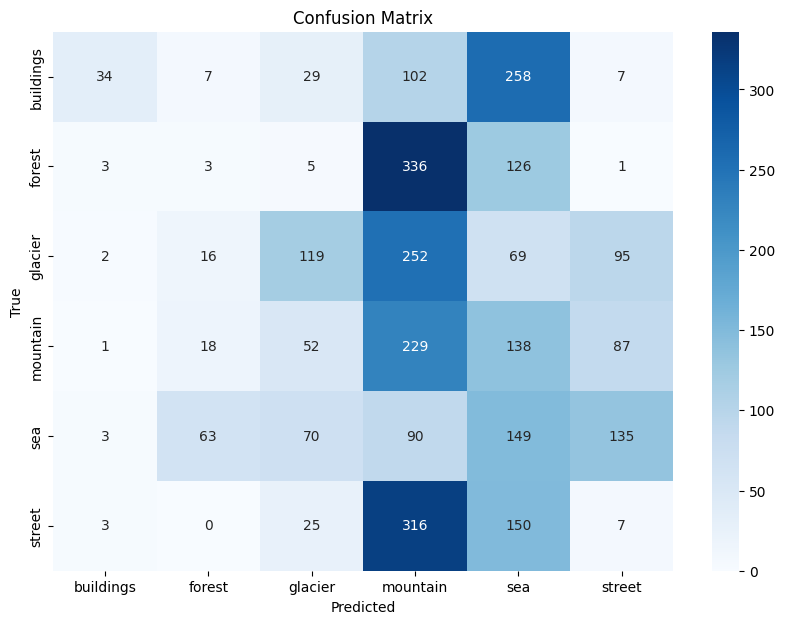

In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `train_dataset` and `test_dataset` are already defined and loaded
# For example purposes, let's define transformations and load datasets (modify paths accordingly)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ImageFolder(root='/content/drive/MyDrive/Veltris/Untitled Folder/seg_train/seg_train/', transform=transform)
test_dataset = ImageFolder(root='/content/drive/MyDrive/Veltris/Untitled Folder/seg_test/seg_test', transform=transform)

# Load a pretrained model and modify it for your number of classes
vgg16 = models.vgg16(pretrained=True)

# Freeze the feature extraction part of the model (optional, for fine-tuning only the classifier)
for param in vgg16.features.parameters():
    param.requires_grad = False

# Modify the classifier to fit the number of classes you have
num_classes = 6  # Replace with your number of classes
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 4096),  # This is the original first layer of VGG16 classifier
    nn.Linear(4096, 1024),  # Additional layer
    nn.Linear(1024, 512),  # Additional layer
    nn.Linear(512, 6)  # Final layer that outputs to your number of classes
)


# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)


# Define loss function, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16.parameters(), lr=0.01)

# Evaluation
vgg16.eval()
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

all_preds = []
all_targets = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


